## Data And Packages Loading

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

In [2]:
# Loading Data
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t', na_values = None)

C:\Users\HP\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Dropping ['id', 'member_id'] as it will not play important role into model building process.
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(['id', 'member_id'],inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

Before Dropping Shape of Data :(855969, 73)
After Dropping Shape of Data :(855969, 71)


## Data Preprocessing

#### Checking for NA values And Fill NA's or NAN's values with appropriate Values

In [5]:
# Method for getting NA values
drop_columns = []

def get_na(data): 
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]
    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        print(str(null_vars/data.shape[0] * 100))
        # null_vars.plot.bar(figsize=(15,4))
    else:
        print("No column have NA values")

In [6]:
get_na(data)

title                           0.003855
last_credit_pull_d              0.005841
collections_12_mths_ex_med      0.006542
revol_util                      0.052105
last_pymnt_d                    1.035318
emp_length                      5.030673
emp_title                       5.776261
total_rev_hi_lim                7.863953
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
next_pymnt_d                   29.553757
mths_since_last_delinq         51.381767
mths_since_last_major_derog    75.099682
mths_since_last_record         84.674211
desc                           85.769111
inq_fi                         98.447607
all_util                       98.447607
max_bal_bc                     98.447607
open_rv_24m                    98.447607
open_rv_12m                    98.447607
total_bal_il                   98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_il_6m                     98.447607
open_acc_6m     

In [7]:
## Removing Columns those are having more than 70% missing data
drop_columns_list = ['mths_since_last_major_derog', 'mths_since_last_record','desc',
                     'inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','total_bal_il','open_il_24m',
                     'open_il_12m','open_il_6m','open_acc_6m','total_cu_tl','inq_last_12m','mths_since_rcnt_il',
                     'il_util','verification_status_joint','annual_inc_joint','dti_joint']

In [8]:
len(drop_columns_list)

20

In [9]:
# Dropping Columns those having more than 70% NA Values
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(drop_columns_list, inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

Before Dropping Shape of Data :(855969, 71)
After Dropping Shape of Data :(855969, 51)


In [10]:
# zip_code
data.zip_code.head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [11]:
# We are dropping zip_code as it can't be use into model building
data.drop('zip_code', inplace = True, axis = 1)

In [12]:
# Reviewing policy_code Column
data.policy_code.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: policy_code, dtype: float64

In [13]:
data.policy_code.value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [14]:
# We are dropping policy_code as it only have one label for entire dataset that will lead to bias into model
data.drop('policy_code', inplace = True, axis = 1)

In [15]:
# emp_title - The job title supplied by the Borrower when applying for the loan.
data.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [16]:
data.emp_title.value_counts()

Teacher                                   12965
Manager                                   10821
Registered Nurse                           5341
RN                                         5182
Owner                                      5157
Supervisor                                 4792
Sales                                      4051
Project Manager                            3856
Driver                                     3417
Office Manager                             3404
Director                                   3067
General Manager                            3060
manager                                    2994
teacher                                    2820
owner                                      2727
Engineer                                   2574
President                                  2478
driver                                     2319
Vice President                             2283
Attorney                                   2074
Operations Manager                      

In [17]:
# Dropping emp_title as it is having 290912 lables and it will not impact on model.
data.drop('emp_title',inplace = True, axis = 1)

In [18]:
# Treatment for emp_length - Employment length in years.
data.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [19]:
data.emp_length = data.emp_length.str.replace(r'\D', '')
data.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [20]:
data.emp_length.value_counts()

10    282090
1     122452
2      75986
3      67392
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [21]:
data.emp_length.isna().sum()

43061

In [22]:
# Filling NA values
data.emp_length.fillna(10, inplace = True)
# Change Datatype of variable to numeric as it is represanting no of years
data.emp_length = data.emp_length.astype('int32')
data.emp_length.dtype

dtype('int32')

In [23]:
# Treatment for term Variable - The number of payments on the loan. Values are in months and can be either 36 or 60.
data.term.head

<bound method NDFrame.head of 0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
5          36 months
6          60 months
7          36 months
8          60 months
9          60 months
10         60 months
11         36 months
12         36 months
13         36 months
14         36 months
15         36 months
16         36 months
17         36 months
18         36 months
19         36 months
20         60 months
21         36 months
22         36 months
23         36 months
24         36 months
25         36 months
26         36 months
27         60 months
28         36 months
29         36 months
             ...    
855939     36 months
855940     60 months
855941     36 months
855942     36 months
855943     60 months
855944     36 months
855945     36 months
855946     60 months
855947     60 months
855948     60 months
855949     60 months
855950     60 months
855951     36 months
855952     36 months
855953     36 months
8559

In [24]:
data.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [25]:
# last_credit_pull_d - The most recent month XYZ corp. pulled credit for this loan
data.last_credit_pull_d.head()

0    Jan-2016
1    Sep-2013
2    Jan-2016
3    Jan-2015
4    Jan-2016
Name: last_credit_pull_d, dtype: object

In [26]:
# next_pymnt_d - Next scheduled payment date
data.next_pymnt_d.head()

0         NaN
1         NaN
2         NaN
3         NaN
4    Feb-2016
Name: next_pymnt_d, dtype: object

In [27]:
# earliest_cr_line - The month the borrower's earliest reported credit line was opened
data.earliest_cr_line.head()

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
4    Jan-1996
Name: earliest_cr_line, dtype: object

In [28]:
# Dropping Time Variables (Dates) from dataset
date_cols = ['last_credit_pull_d', 'next_pymnt_d', 'earliest_cr_line']
data.drop(date_cols,inplace = True, axis = 1)

In [29]:
data.shape

(855969, 45)

In [30]:
# title - The loan title provided by the borrower
data.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

In [31]:
# Dropping title as it can be anything.
data.drop('title',inplace = True, axis = 1)

In [32]:
# verification_status - Was the income source verified
data.verification_status.head()

0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object

In [33]:
# Mapping and Set Lable for 'Source Verified' to 'Verified'
data.verification_status = data.verification_status.map({'Verified': 'Verified', 'Source Verified': 'Verified', 
                                                         'Not Verified':'Not Verified'})

In [34]:
data.verification_status.head()

0        Verified
1        Verified
2    Not Verified
3        Verified
4        Verified
Name: verification_status, dtype: object

In [35]:
# application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
data.application_type.head()

0    INDIVIDUAL
1    INDIVIDUAL
2    INDIVIDUAL
3    INDIVIDUAL
4    INDIVIDUAL
Name: application_type, dtype: object

In [36]:
data.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [37]:
# addr_state - The state provided by the borrower in the loan application
data.addr_state.head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

In [38]:
print('Total No of values for state : {}'.format(len(data.addr_state.value_counts())))

Total No of values for state : 51


In [39]:
# purpose - A category provided by the borrower for the loan request
data.purpose.head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

In [40]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [41]:
data.purpose = data.purpose.map({'debt_consolidation': 'debt_consolidation','credit_card':'credit_card',
'home_improvement':'Other', 'major_purchase':'Other', 'small_business':'Other', 'car':'Other', 'medical':'Other', 
'moving':'Other','vacation':'Other', 'house':'Other', 'wedding':'Other', 'renewable_energy':'Other', 'educational':'Other'})

In [42]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
Other                 109484
Name: purpose, dtype: int64

In [43]:
data.purpose.isna().sum()

40949

In [44]:
data.purpose.fillna('Other', inplace = True)

In [45]:
# loan_amnt - The listed amount of the loan applied for by the borrower.
data.loan_amnt.head()

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: loan_amnt, dtype: float64

In [46]:
# home_ownership - The home ownership status provided by the borrower during registratio
data.home_ownership.head()

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object

In [47]:
data.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [48]:
# Replacing OTHER , NONE , ANY to Other for Reducing Columns while Dummy Coding
data.home_ownership = data.home_ownership.map({'MORTGAGE':'Mortgage', 'RENT': 'Rent', 'OWN':'Own', 'OTHER':'Other', 
                                               'NONE': 'Other','ANY':'Other' })

In [49]:
data.home_ownership.value_counts()

Mortgage    429106
Rent        342535
Own          84136
Other          192
Name: home_ownership, dtype: int64

In [50]:
# grade - Assigned loan grade
data.grade.head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [51]:
# sub_grade - Assigned loan sub_grade
data.sub_grade.head()

0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

In [52]:
# Grade and Sub_grade are similar kind of factor. In this case Sub_grade can be better parameter to consider into model building process. So, we can remove Grade from dataset.
data.drop('grade',inplace = True, axis = 1)

In [53]:
# open_acc - The number of open credit lines in the borrower's credit file.
data.open_acc.head()

0     3.0
1     3.0
2     2.0
3    10.0
4    15.0
Name: open_acc, dtype: float64

In [54]:
# Converting Datatype of open_acc as it is representing numbers
data.open_acc = data.open_acc.astype('int32')
data.open_acc.dtype

dtype('int32')

In [55]:
# delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
data.delinq_2yrs.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: delinq_2yrs, dtype: float64

In [56]:
# Converting Datatype of delinq_2yrs as it is showing numbers
data.delinq_2yrs = data.delinq_2yrs.astype('int32')
data.delinq_2yrs.dtype

dtype('int32')

In [57]:
# inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
data.inq_last_6mths.head()

0    1.0
1    5.0
2    2.0
3    1.0
4    0.0
Name: inq_last_6mths, dtype: float64

In [58]:
# Converting Datatype of delinq_2yrs as it is showing numbers
data.inq_last_6mths = data.inq_last_6mths.astype('int32')
data.inq_last_6mths.dtype

dtype('int32')

In [59]:
# funded_amnt - The total amount committed to that loan at that point in time.
data.funded_amnt.head()

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64

In [60]:
# funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
data.funded_amnt_inv.head()

0     4975.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt_inv, dtype: float64

In [61]:
# int_rate - Interest Rate on the loan
data.int_rate.head() 

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [62]:
# installment - The monthly payment owed by the borrower if the loan originates.
data.installment.head()

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

In [63]:
# annual_inc - The self-reported annual income provided by the borrower during registration.
data.annual_inc.head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [64]:
# issue_d - The month which the loan was funded
data.issue_d.head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [65]:
# pymnt_plan - Indicates if a payment plan has been put in place for the loan
data.pymnt_plan.head()

0    n
1    n
2    n
3    n
4    n
Name: pymnt_plan, dtype: object

In [66]:
data.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [67]:
# We can't consider pymnt_plan column as it is showing same value for almost all records
data.drop('pymnt_plan', axis = 1, inplace= True)

In [68]:
# dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
data.dti.head()

0    27.65
1     1.00
2     8.72
3    20.00
4    17.94
Name: dti, dtype: float64

In [69]:
# pub_rec - Number of derogatory public records
data.pub_rec.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec, dtype: float64

In [70]:
data.pub_rec.value_counts()

0.0     725455
1.0     108920
2.0      14250
3.0       4305
4.0       1496
5.0        728
6.0        366
7.0        167
8.0        110
9.0         46
10.0        41
11.0        21
12.0        14
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
19.0         2
49.0         2
40.0         1
26.0         1
63.0         1
22.0         1
28.0         1
86.0         1
34.0         1
23.0         1
54.0         1
Name: pub_rec, dtype: int64

In [71]:
#Feature Engineering for pub_rec. If Number of derogatory public records is less than 3 will go for good else go in fever of bad
data.pub_rec = np.where(data.pub_rec <= 2, 'Good', 'Bad')

In [72]:
# revol_bal - Total credit revolving balance
data.revol_bal.head()

0    13648.0
1     1687.0
2     2956.0
3     5598.0
4    27783.0
Name: revol_bal, dtype: float64

In [73]:
# revol_util - Revolving line utilization rate, or 
# the amount of credit the borrower is using relative to all available revolving credit.
data.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [74]:
data.revol_util.fillna(data.revol_util.mean(),inplace = True )

In [75]:
data.revol_util.isna().sum()

0

In [76]:
# total_acc - The total number of credit lines currently in the borrower's credit file
data.total_acc.head()

0     9.0
1     4.0
2    10.0
3    37.0
4    38.0
Name: total_acc, dtype: float64

In [77]:
# out_prncp - Remaining outstanding principal for total amount funded
data.out_prncp.head()

0      0.0
1      0.0
2      0.0
3      0.0
4    766.9
Name: out_prncp, dtype: float64

In [78]:
# out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
data.out_prncp_inv.head()

0      0.0
1      0.0
2      0.0
3      0.0
4    766.9
Name: out_prncp_inv, dtype: float64

In [79]:
# total_pymnt - Payments received to date for total amount funded
data.total_pymnt.head()

0     5861.071414
1     1008.710000
2     3003.653644
3    12226.302212
4     3242.170000
Name: total_pymnt, dtype: float64

In [80]:
# total_pymnt_inv - Payments received to date for portion of total amount funded by investors
data.total_pymnt_inv.head()

0     5831.78
1     1008.71
2     3003.65
3    12226.30
4     3242.17
Name: total_pymnt_inv, dtype: float64

In [81]:
# total_rec_prncp - Principal received to date
data.total_rec_prncp.head()

0     5000.00
1      456.46
2     2400.00
3    10000.00
4     2233.10
Name: total_rec_prncp, dtype: float64

In [82]:
# total_rec_int - Interest received to date
data.total_rec_int.head()

0     861.07
1     435.17
2     603.65
3    2209.33
4    1009.07
Name: total_rec_int, dtype: float64

In [83]:
# collection_recovery_fee - post charge off collection fee
data.collection_recovery_fee.head()

0    0.00
1    1.11
2    0.00
3    0.00
4    0.00
Name: collection_recovery_fee, dtype: float64

In [84]:
# recoveries - post charge off gross recovery
data.recoveries.head()

0      0.00
1    117.08
2      0.00
3      0.00
4      0.00
Name: recoveries, dtype: float64

In [85]:
# last_pymnt_d - Last month payment was received
data.last_pymnt_d.head()

0    Jan-2015
1    Apr-2013
2    Jun-2014
3    Jan-2015
4    Jan-2016
Name: last_pymnt_d, dtype: object

In [86]:
data.drop('last_pymnt_d', inplace = True, axis = 1)

In [87]:
# last_pymnt_amnt - Last total payment amount received
data.last_pymnt_amnt.head()

0    171.62
1    119.66
2    649.91
3    357.48
4     67.79
Name: last_pymnt_amnt, dtype: float64

In [88]:
# collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
data.collections_12_mths_ex_med.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: collections_12_mths_ex_med, dtype: float64

In [89]:
data.collections_12_mths_ex_med.fillna(round(data.collections_12_mths_ex_med.mean(),2), inplace = True)

In [90]:
# acc_now_delinq - The number of accounts on which the borrower is now delinquent.
data.acc_now_delinq.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: acc_now_delinq, dtype: float64

In [91]:
# tot_coll_amt - Total collection amounts ever owed
data.tot_coll_amt.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: tot_coll_amt, dtype: float64

In [92]:
data.tot_coll_amt.fillna(round(data.tot_coll_amt.mean(),2), inplace = True)

In [93]:
# tot_cur_bal - Total collection amounts ever owed
data.tot_cur_bal.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: tot_cur_bal, dtype: float64

In [94]:
data.tot_cur_bal.fillna(round(data.tot_cur_bal.mean(),2), inplace = True)

In [95]:
data.tot_cur_bal.isna().sum()

0

In [96]:
# total_rev_hi_lim - Total revolving high credit/credit limit
data.total_rev_hi_lim.tail()

855964    17100.0
855965    10200.0
855966    18000.0
855967    27000.0
855968    41700.0
Name: total_rev_hi_lim, dtype: float64

In [97]:
data.total_rev_hi_lim.fillna(round(data.total_rev_hi_lim.mean(),2), inplace = True)

In [98]:
# mths_since_last_delinq - The number of months since the borrower's last delinquency.
data.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [99]:
data.mths_since_last_delinq.fillna(0,inplace= True)

### List of Columns having NA values

In [100]:
get_na(data)

No column have NA values


In [102]:
# Sorting Data according to issue_d column
data.issue_d = pd.to_datetime(data.issue_d)
data = data.set_index(data.issue_d)
data = data.sort_index()

# Dropping issue_d as it is not required now
data.drop('issue_d', axis = 1, inplace = True)

In [103]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,7500.0,7500.0,800.0,36 months,13.75,255.43,E2,1,Own,22000.0,...,0.0,0.0,256.59,0.01,INDIVIDUAL,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,4150.0,36 months,7.43,155.38,A2,8,Mortgage,150000.0,...,0.0,0.0,4397.47,0.01,INDIVIDUAL,0.0,225.41,139766.25,32163.57,0
2007-07-01,5750.0,5750.0,3675.0,36 months,7.43,178.69,A2,10,Mortgage,125000.0,...,0.0,0.0,4.74,0.01,INDIVIDUAL,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,3975.0,36 months,7.43,155.38,A2,6,Rent,40000.0,...,0.0,0.0,158.65,0.01,INDIVIDUAL,0.0,225.41,139766.25,32163.57,0
2007-07-01,1200.0,1200.0,0.0,36 months,11.54,39.60,C5,1,Rent,20000.0,...,0.0,0.0,39.45,0.01,INDIVIDUAL,0.0,225.41,139766.25,32163.57,0


In [106]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [107]:
# Devide Categorical And Numerical Data
cat_data = data.select_dtypes('O')
num_data = data.drop(cat_data, axis=1)

In [108]:
cat_data.head()

,term,sub_grade,home_ownership,verification_status,purpose,addr_state,pub_rec,initial_list_status,application_type
issue_d,,,,,,,,,
2007-06-01,36 months,E2,Own,Not Verified,debt_consolidation,MA,Good,f,INDIVIDUAL
2007-07-01,36 months,A2,Mortgage,Not Verified,Other,GA,Good,f,INDIVIDUAL
2007-07-01,36 months,A2,Mortgage,Not Verified,debt_consolidation,MA,Good,f,INDIVIDUAL
2007-07-01,36 months,A2,Rent,Not Verified,Other,WI,Good,f,INDIVIDUAL
2007-07-01,36 months,C5,Rent,Not Verified,credit_card,ME,Good,f,INDIVIDUAL


In [109]:
num_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,7500.0,7500.0,800.0,13.75,255.43,1,22000.0,14.29,1,0,...,0.0,0.0,0.0,256.59,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,4150.0,7.43,155.38,8,150000.0,0.00,0,0,...,0.0,0.0,0.0,4397.47,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5750.0,5750.0,3675.0,7.43,178.69,10,125000.0,0.27,0,0,...,0.0,0.0,0.0,4.74,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,3975.0,7.43,155.38,6,40000.0,2.55,0,2,...,0.0,0.0,0.0,158.65,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,1200.0,1200.0,0.0,11.54,39.60,1,20000.0,2.04,0,2,...,0.0,0.0,0.0,39.45,0.01,0.0,225.41,139766.25,32163.57,0


## EDA - Exploratory Data Analysis

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### EDA for Categorical Variables

In [110]:
cat_data.columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'pub_rec', 'initial_list_status', 'application_type'],
      dtype='object')

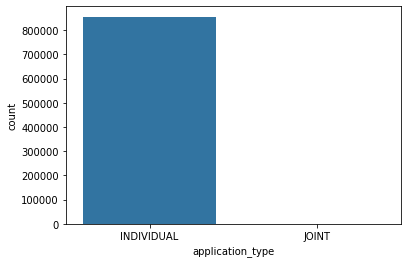

In [120]:
sns.countplot(data = cat_data, x = 'application_type')

In [128]:
# application_type is not having sufficient Joint Label cases so We can Drop it
data.drop('application_type', axis= 1, inplace = True)

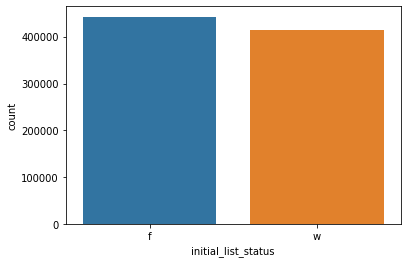

In [121]:
sns.countplot(data = cat_data, x = 'initial_list_status')

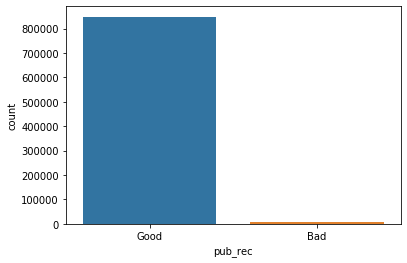

In [122]:
sns.countplot(data = cat_data, x = 'pub_rec')

In [129]:
# pub_rec is not having sufficient Joint Label cases so We can Drop it
data.drop('pub_rec', axis= 1, inplace = True)

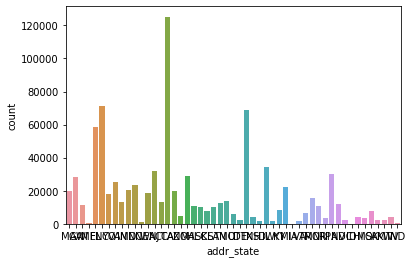

In [123]:
sns.countplot(data = cat_data, x = 'addr_state')

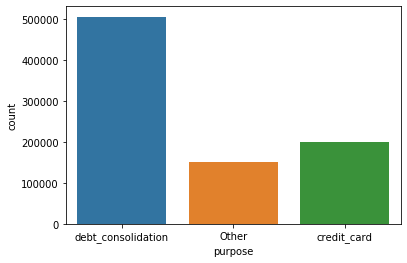

In [124]:
sns.countplot(data = cat_data, x = 'purpose')

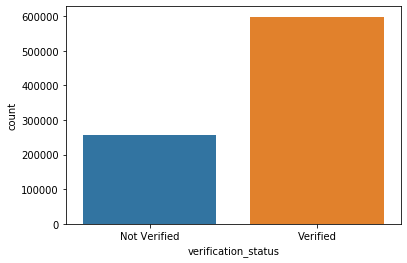

In [125]:
sns.countplot(data = cat_data, x = 'verification_status')

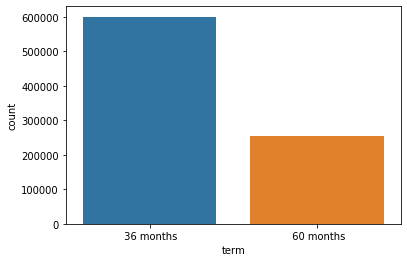

In [117]:
sns.countplot(data = cat_data, x = 'home_ownership')

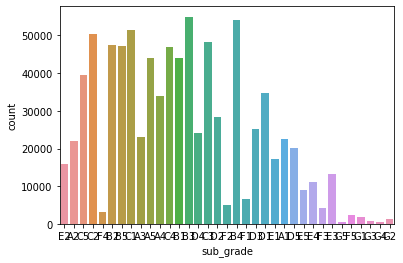

In [119]:
sns.countplot(data = cat_data, x = 'sub_grade')

REF: https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way

In [126]:
num_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [130]:
data.to_csv('dataset/ref_data.csv')